# Digital Transformation in Banking Sector

## PROJECT OBJECTIVE: 
### Build a ML model to perform focused digital marketing by predicting the potential customers who will convert from liability customers to asset customers.
## CONTEXT: 
### Bank has a growing customer base where majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. In the last town hall, the marketing head mentioned that digital transformation being the core strength of the business strategy, how  to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign. You as a data scientist asked to develop machine learning model to identify potential borrowers to support focused marketing.


### DATA DESCRIPTION: The data consists of the following attributes:
1. ID: Customer ID
2. Age Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card

In [2]:
#Import Libraries

In [3]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load customer data present in CSV file
data1 = pd.read_csv("../data/Data1.csv")
data2 = pd.read_csv("../data/Data2.csv")

In [5]:
# Shape and size of data
print(data1.shape)
print(data2.shape)

(5000, 8)
(5000, 7)


In [6]:
data1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [7]:
data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [8]:
# Merging two data frames. Use Pandas merge function to merge two data frames based on cutomer ID
cust_data=data1.merge(data2, how='inner', on='ID')

In [9]:
# Explore final shape of data
print(cust_data.shape)

(5000, 14)


In [10]:
# Explore data types
cust_data.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

### Comment: As all data attributes are quantitative data, we don't need data transformation here

In [11]:
# Data description
cust_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Level,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Security,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [12]:
cust_data["CreditCard"].value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

In [13]:
# Dropping ID as it doesn't have any impact on learning
cust_data = cust_data.drop(columns='ID')

In [14]:
cust_data.shape

(5000, 13)

In [15]:
# Check for null value
cust_data.isnull().sum()

Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

### Comment: LoanOnCard attribute has 20 null data, which is 0.4% only. Secondly, it is the target class hence we can't repplace null value using mean or mode. We can remove these data from our dataset.

In [16]:
# Using Panda's dropna function to drop rows having null values.
cust_data = cust_data.dropna()

In [17]:
#Explore Size after null value removal
cust_data.shape

(4980, 13)

## Exploratory Data Analysis

In [18]:
# Let explore how data is distributed as per target class.
sns.countplot(x = 'LoanOnCard',  data = cust_data);

#### This shows clearly data is highly imbalanced.

### Calculate target class data percentage

In [19]:
n_true = len(cust_data.loc[cust_data['LoanOnCard'] == 1.0])
n_false = len(cust_data.loc[cust_data['LoanOnCard'] == 0.0])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 480 (9.64%)
Number of false cases: 4500 (90.36%)


## Comment: Data imbalance is a typical problem in machine learning. Later we shall use it's impact when we develop ML models.

In [20]:
# Scatter plot to see how data points are distributed for "MonthlyAverageSpend" and "HighestSpend" as per target class
g = sns.scatterplot(x="HighestSpend", y="MonthlyAverageSpend", hue="LoanOnCard",
             data=cust_data,legend='full')
g.set(xscale="log")


[None]

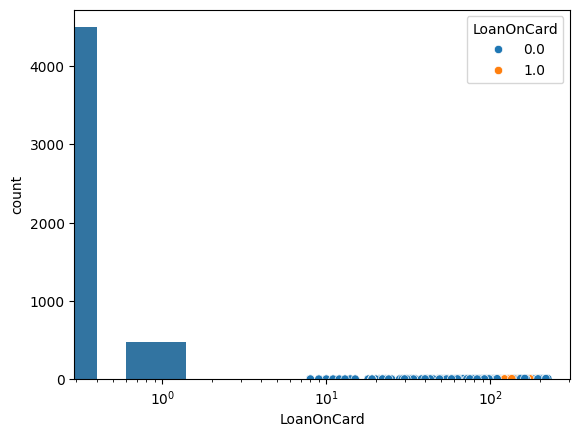

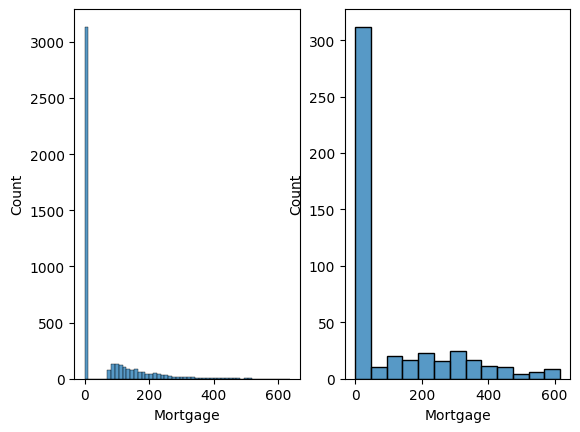

In [21]:
fig, ax = plt.subplots(1, 2)
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 0.0, 'Mortgage'], ax = ax[0])
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 1.0, 'Mortgage'], ax = ax[1])
plt.show()

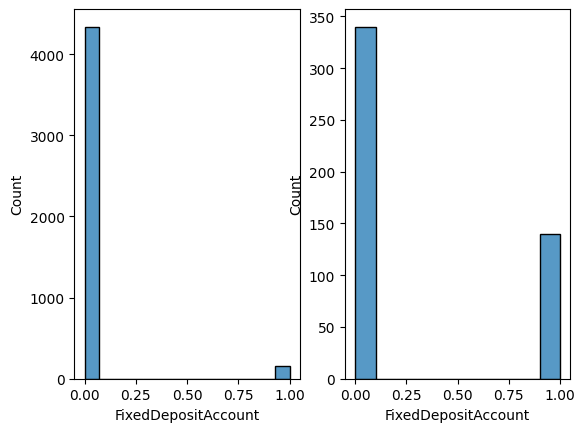

In [22]:
fig, ax = plt.subplots(1, 2)
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 0.0, 'FixedDepositAccount'], ax = ax[0])
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 1.0, 'FixedDepositAccount'], ax = ax[1])
plt.show()

In [23]:
columns = list(cust_data)[0:-1] # Excluding Outcome column which has only 
cust_data[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 8 columns

In [24]:
#sns.pairplot(cust_data, height=3, hue = 'LoanOnCard')

### Zipcode doesn't have any significance with other dependant variables and on learning, hence drop it from dependant variable list.

### Age and customer Since have similar information content. Will verify through correlation analysis


In [25]:
cust_data = cust_data.drop(columns='ZipCode')

In [26]:
#Correlation analysis
corr = cust_data.corr()
corr

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
Age,1.000000,0.994208,-0.054951,-0.045289,-0.051896,0.042750,-0.013272,0.000323,0.007744,0.011227,0.007344,-0.008147
CustomerSince,0.994208,1.000000,-0.046092,-0.051456,-0.049918,0.014545,-0.011380,-0.000469,0.010085,0.011355,0.008779,-0.007801
HighestSpend,-0.054951,-0.046092,1.000000,-0.158357,0.646109,-0.188909,0.207236,-0.002284,0.169535,0.014202,-0.002780,0.502626
HiddenScore,-0.045289,-0.051456,-0.158357,1.000000,-0.109180,0.065762,-0.021396,0.019061,0.014327,0.010900,0.010784,0.061761
MonthlyAverageSpend,-0.051896,-0.049918,0.646109,-0.109180,1.000000,-0.137020,0.110275,0.015105,0.136410,-0.003475,-0.006577,0.366912
Level,0.042750,0.014545,-0.188909,0.065762,-0.137020,1.000000,-0.032863,-0.009443,0.013982,-0.014556,-0.011766,0.137010
Mortgage,-0.013272,-0.011380,0.207236,-0.021396,0.110275,-0.032863,1.000000,-0.005002,0.089167,-0.007044,-0.007600,0.141947
Security,0.000323,-0.000469,-0.002284,0.019061,0.015105,-0.009443,-0.005002,1.000000,0.317673,0.014007,-0.014518,0.021982
FixedDepositAccount,0.007744,0.010085,0.169535,0.014327,0.136410,0.013982,0.089167,0.317673,1.000000,0.176082,0.278924,0.316131
InternetBanking,0.011227,0.011355,0.014202,0.010900,-0.003475,-0.014556,-0.007044,0.014007,0.176082,1.000000,0.004960,0.006034


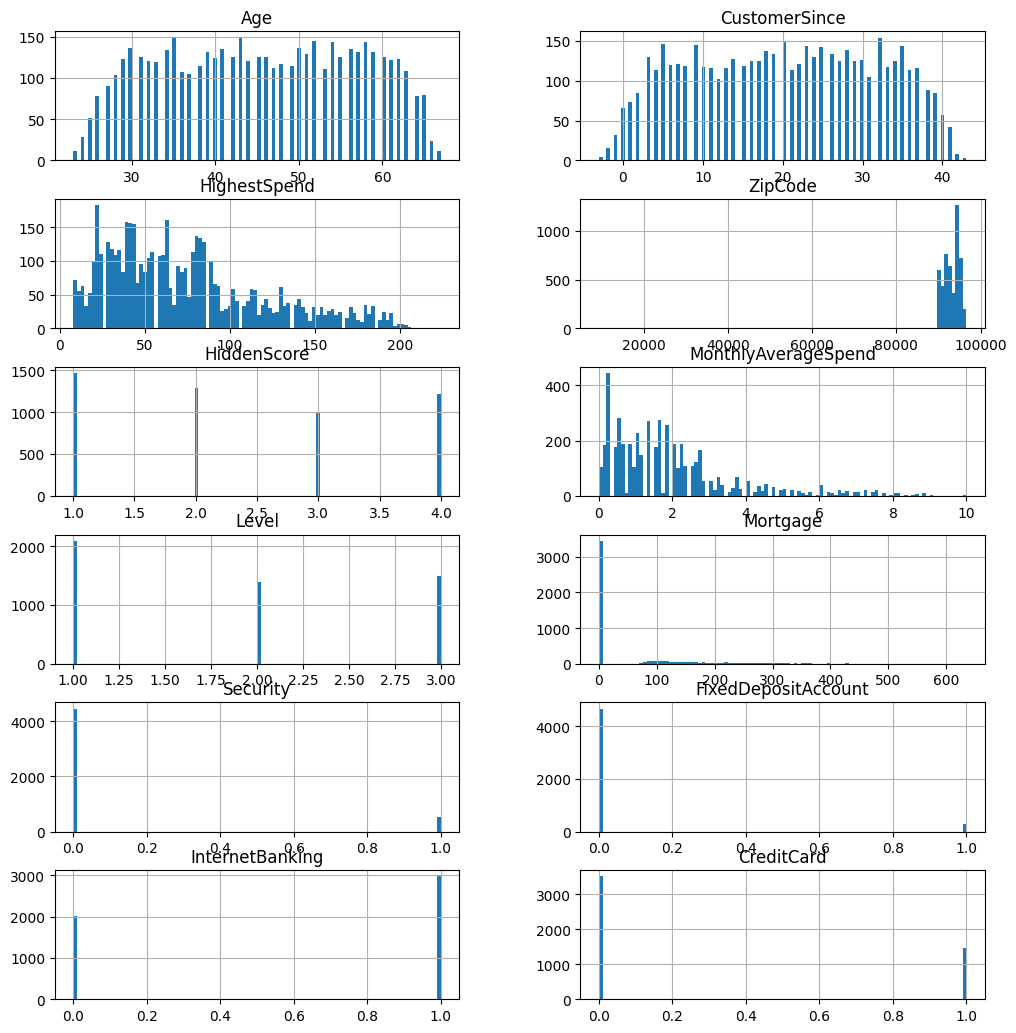

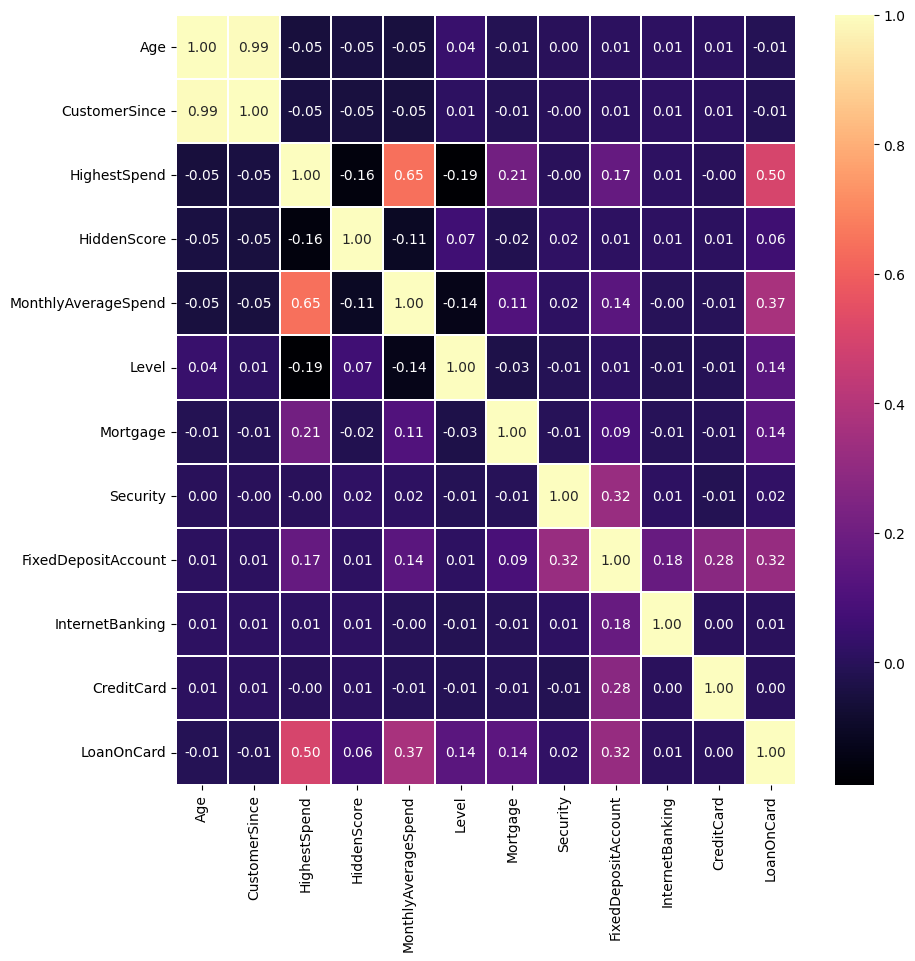

In [27]:
#heatmap
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(cust_data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

### As "Age" and "customerSince" are highly correlated, we can drop 1. I am dropping "Age"

In [28]:
cust_data = cust_data.drop(columns='Age')

In [29]:
cust_data.shape

(4980, 11)

In [30]:
cust_data.head(10)

,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,9,180,1,8.9,3,0,0,0,0,0,1.0
10,39,105,4,2.4,3,0,0,0,0,0,0.0
11,5,45,3,0.1,2,0,0,0,1,0,0.0
12,23,114,2,3.8,3,0,1,0,0,0,0.0
13,32,40,4,2.5,2,0,0,0,1,0,0.0
14,41,112,1,2.0,1,0,1,0,0,0,0.0
15,30,22,1,1.5,3,0,0,0,1,1,0.0
16,14,130,4,4.7,3,134,0,0,0,0,1.0
17,18,81,4,2.4,1,0,0,0,0,0,0.0
18,21,193,2,8.1,3,0,0,0,0,0,1.0


## Spliting the data 
We will use 70% of data for training and 30% for testing.

In [31]:
from sklearn.model_selection import train_test_split

X = cust_data.drop('LoanOnCard',axis=1)     # Predictor feature columns (8 X m)
Y = cust_data['LoanOnCard']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
1479,4,43,1,1.0,3,102,0,0,0,0
1727,26,54,2,1.5,2,0,0,0,0,1
2843,3,20,4,1.0,1,134,0,0,1,1
4106,22,54,1,1.2,2,0,0,0,0,0
1768,18,128,4,5.3,1,84,0,0,0,0


## Logistic Regression

In [32]:
# import model and matrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5       6  \
0 -0.008115  0.042455  0.368331  0.085283  1.268261  0.000155 -0.8128   

         7        8         9  intercept  
0  3.09196 -0.63182 -0.905691  -9.775352  


In [33]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9451137884872824


In [34]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')
print(f'Precision score: {precision_score(y_test,y_predict)}')
print(f'f1 score: {f1_score(y_test,y_predict)}')

Accuracy Score: 0.9451137884872824
Confusion Matrix: 
[[1326   15]
 [  67   86]]
Area Under Curve: 0.7754529104706761
Recall score: 0.5620915032679739
Precision score: 0.8514851485148515
f1 score: 0.6771653543307087


### For minority class, the above model is able to predict 86 correctly, out of 153. Although the accuracy is high, still the model is not a good model. We need to handle the unbalanced data 

## Weighted Logistic Regression to handle class inbalance


In [35]:
# define class weights
w = {0:1, 1:2}

# Fit the model on train
model_weighted = LogisticRegression(solver="liblinear", class_weight=w)
model_weighted.fit(x_train, y_train)
#predict on test
y_predict = model_weighted.predict(x_test)

In [36]:
print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')
print(f'Precision score: {precision_score(y_test,y_predict)}')
print(f'f1 score: {f1_score(y_test,y_predict)}')

Accuracy Score: 0.9444444444444444
Confusion Matrix: 
[[1305   36]
 [  47  106]]
Area Under Curve: 0.8329824099662237
Recall score: 0.6928104575163399
Precision score: 0.7464788732394366
f1 score: 0.7186440677966102


### Although the accuracy decreases, AUC and recall increases significantly, hence, it is a better model. Hence we select "model_weighted".

## Train Naive bayes algorithm

In [37]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# create the model
diab_model = GaussianNB()

diab_model.fit(x_train, y_train)

GaussianNB()

### Performance with training data

In [38]:
diab_train_predict = diab_model.predict(x_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, diab_train_predict)))
print()

Model Accuracy: 0.8867



### Performance with testing data


In [39]:
y_predict = diab_model.predict(x_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, y_predict)))
print()

Model Accuracy: 0.8809



In [40]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')

Accuracy Score: 0.8808567603748326
Confusion Matrix: 
[[1230  111]
 [  67   86]]
Area Under Curve: 0.7396587270254859
Recall score: 0.5620915032679739


### Use of class prior for inbalanced data

In [41]:
diab_model_cp = GaussianNB(priors=[0.1, 0.9])
#diab_model.class_prior_ = [0.9, 0.1]
diab_model_cp.fit(x_train, y_train.ravel())
y_predict = diab_model_cp.predict(x_test)

C:\Users\user\AppData\Local\Temp\ipykernel_15432\2069370495.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  diab_model_cp.fit(x_train, y_train.ravel())


In [42]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')

Accuracy Score: 0.8172690763052208
Confusion Matrix: 
[[1080  261]
 [  12  141]]
Area Under Curve: 0.8634688774838792
Recall score: 0.9215686274509803


## Support Vector Machines

In [43]:
from sklearn import svm
clf = svm.SVC(gamma=0.25, C=10)
clf.fit(x_train , y_train)
y_predict = clf.predict(x_test)

In [44]:
### gamma is a measure of influence of a data point. It is inverse of distance of influence. 
### C is penalty of wrong classifications

In [45]:
print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')
print(f'Precision score: {precision_score(y_test,y_predict)}')
print(f'f1 score: {f1_score(y_test,y_predict)}')

Accuracy Score: 0.8989290495314591
Confusion Matrix: 
[[1337    4]
 [ 147    6]]
Area Under Curve: 0.5181164188270387
Recall score: 0.0392156862745098
Precision score: 0.6
f1 score: 0.0736196319018405


In [46]:
from scipy.stats import zscore
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 
XScaled.describe()

,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
count,4.980000e+03,4.980000e+03,4.980000e+03,4.980000e+03,4.980000e+03,4.980000e+03,4.980000e+03,4.980000e+03,4.980000e+03,4.980000e+03
mean,-7.918699e-17,-8.418077e-17,-3.210283e-17,1.212774e-16,6.563246e-17,2.853585e-17,5.992529e-17,-2.639566e-17,6.705925e-17,-9.060133e-17
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-2.015918e+00,-1.429540e+00,-1.216634e+00,-1.108414e+00,-1.048644e+00,-5.557467e-01,-3.414556e-01,-2.540817e-01,-1.217601e+00,-6.459012e-01
25%,-8.822859e-01,-7.565844e-01,-1.216634e+00,-7.083749e-01,-1.048644e+00,-5.557467e-01,-3.414556e-01,-2.540817e-01,-1.217601e+00,-6.459012e-01
50%,-1.026117e-02,-2.138784e-01,-3.448588e-01,-2.511878e-01,1.417474e-01,-5.557467e-01,-3.414556e-01,-2.540817e-01,8.212871e-01,-6.459012e-01
75%,8.617636e-01,5.242016e-01,5.269162e-01,3.345832e-01,1.332139e+00,4.361362e-01,-3.414556e-01,-2.540817e-01,8.212871e-01,1.548224e+00
max,1.995396e+00,3.259439e+00,1.398691e+00,4.606425e+00,1.332139e+00,5.680349e+00,2.928638e+00,3.935742e+00,8.212871e-01,1.548224e+00


In [47]:
x_trains, x_tests, y_trains, y_tests = train_test_split(XScaled, Y, test_size=0.3, random_state=1)

In [48]:
clf = svm.SVC(gamma=0.25, C=10)
clf.fit(x_trains , y_trains)
y_predicts = clf.predict(x_tests)

In [49]:
print(f'Accuracy Score: {accuracy_score(y_tests,y_predicts)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_tests, y_predicts)}')
print(f'Area Under Curve: {roc_auc_score(y_tests, y_predicts)}')
print(f'Recall score: {recall_score(y_tests,y_predicts)}')
print(f'Precision score: {precision_score(y_tests,y_predicts)}')
print(f'f1 score: {f1_score(y_tests,y_predicts)}')

Accuracy Score: 0.9745649263721553
Confusion Matrix: 
[[1332    9]
 [  29  124]]
Area Under Curve: 0.9018730534719481
Recall score: 0.8104575163398693
Precision score: 0.9323308270676691
f1 score: 0.8671328671328671


## Decision Tree Classifier

In [50]:
# Build decision tree model
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [51]:
# Scoring our DT
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

1.0
0.9812583668005355


In [52]:
y_predict = dTree.predict(x_test)
print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')
print(f'Precision score: {precision_score(y_test,y_predict)}')
print(f'f1 score: {f1_score(y_test,y_predict)}')

Accuracy Score: 0.9812583668005355
Confusion Matrix: 
[[1335    6]
 [  22  131]]
Area Under Curve: 0.9258674386980743
Recall score: 0.8562091503267973
Precision score: 0.9562043795620438
f1 score: 0.903448275862069


In [53]:
#Reducing over fitting (Regularization)
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state=1)
dTreeR.fit(x_train, y_train)
print(dTreeR.score(x_train, y_train))
print(dTreeR.score(x_test, y_test))

0.9905335628227194
0.9825970548862115


In [54]:
y_predictR = dTreeR.predict(x_test)
print(f'Accuracy Score: {accuracy_score(y_test,y_predictR)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predictR)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predictR)}')
print(f'Recall score: {recall_score(y_test,y_predictR)}')
print(f'Precision score: {precision_score(y_test,y_predictR)}')
print(f'f1 score: {f1_score(y_test,y_predictR)}')

Accuracy Score: 0.9825970548862115
Confusion Matrix: 
[[1335    6]
 [  20  133]]
Area Under Curve: 0.9324033864104927
Recall score: 0.869281045751634
Precision score: 0.9568345323741008
f1 score: 0.910958904109589


In [55]:
# Decision Tree Visualize
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
dTreeR3 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR3.fit(x_train, y_train)
fn = list(x_train)
cn = ['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTreeR3, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

## Ensemble Learning: Random forest classifier


In [56]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(random_state=1)
rfcl = rfcl.fit(x_train, y_train)
y_predict = rfcl.predict(x_test)

In [57]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')
print(f'Precision score: {precision_score(y_test,y_predict)}')
print(f'f1 score: {f1_score(y_test,y_predict)}')

Accuracy Score: 0.9859437751004017
Confusion Matrix: 
[[1340    1]
 [  20  133]]
Area Under Curve: 0.934267666798263
Recall score: 0.869281045751634
Precision score: 0.9925373134328358
f1 score: 0.926829268292683


## Unbalanced Data Handelling

In [58]:
# Install imbalanced-learn if you have not used before
!pip install imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.3 kB 187.9 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/258.3 kB 187.9 kB/s eta 0:00:02
   --------- ----------------------------- 61.4/258.3 kB 234.9 kB/s eta 0:00:01
   ---------- ---------------------------- 71.7/258.3 kB 245.8 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/258.3 kB 291.5 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/258.3 kB 328.4 kB/s eta 0:00:01
   ---------------------- --------------- 153.6/258.3 kB 367.6 kB/s eta 0:00:01
   ------------------------- ------------ 174.1/258.3 kB 389.2 kB/s eta 0:00:01
   ------------------------------ ------- 204.8/258.3 kB 402.0 kB/s eta 0:

In [59]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
# summarize class distribution
counter = Counter(Y)
print(counter)
# define pipeline
over = SMOTE(sampling_strategy=0.3,random_state=1) #sampling_strategy=0.1,random_state=1
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [ ('o', over),('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
Xb, Yb = pipeline.fit_resample(X, Y)
# summarize the new class distribution
counter = Counter(Yb)
print(counter)

Counter({0.0: 4500, 1.0: 480})
Counter({0.0: 2700, 1.0: 1350})


In [60]:
x_trainb, x_testb, y_trainb, y_testb = train_test_split(Xb, Yb, test_size=0.3, random_state=1)
# 1 is just any random seed number"

## SVM with balanced Data

In [61]:
clf = svm.SVC(gamma=0.25, C=10)
clf.fit(x_trainb , y_trainb)
y_predictb = clf.predict(x_testb)

In [62]:
# performance
print(f'Accuracy Score: {accuracy_score(y_testb,y_predictb)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_testb, y_predictb)}')
print(f'Area Under Curve: {roc_auc_score(y_testb, y_predictb)}')
print(f'Recall score: {recall_score(y_testb,y_predictb)}')
print(f'Precision score: {precision_score(y_testb,y_predictb)}')
print(f'f1 score: {f1_score(y_testb,y_predictb)}')

Accuracy Score: 0.8650205761316873
Confusion Matrix: 
[[800  15]
 [149 251]]
Area Under Curve: 0.8045475460122699
Recall score: 0.6275
Precision score: 0.943609022556391
f1 score: 0.7537537537537538


## Random Forest classifier with Balanced Data

In [75]:
rfcl = RandomForestClassifier(random_state=10)
rfcl = rfcl.fit(x_trainb, y_trainb)
y_predict = rfcl.predict(x_testb)

In [76]:
# performance
print(f'Accuracy Score: {accuracy_score(y_testb,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_testb, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_testb, y_predict)}')
print(f'Recall score: {recall_score(y_testb,y_predict)}')
print(f'Precision score: {precision_score(y_testb,y_predict)}')
print(f'f1 score: {f1_score(y_testb,y_predict)}')

Accuracy Score: 0.9637860082304527
Confusion Matrix: 
[[787  28]
 [ 16 384]]
Area Under Curve: 0.9628220858895705
Recall score: 0.96
Precision score: 0.9320388349514563
f1 score: 0.9458128078817734


### Chosing hyperparameter using Grid Search

In [65]:
#from sklearn.model_selection import GridSearchCV
#param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.25,0.01],'kernel': ['rbf', 'poly', 'sigmoid']}
#grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)
#grid.fit(x_trainb,y_trainb)
#print(grid.best_estimator_)

## Pickle the model


In [67]:
# Pickle model file
#from sklearn.externals import joblib
import pickle
filename = '../model/finalized_model.pkl'
pickle.dump(rfcl, open(filename, 'wb'))
#joblib.dump(rfcl, open(filename, 'wb'))

## Load model from pickle file and use

In [69]:
# Checking the pickle model
loaded_model = pickle.load(open(filename, 'rb'))
print(loaded_model.predict([[ 1, 30,  2, 30,  2, 40,  1, 1,  1,  1,]]))

[0.]


C:\Users\user\anaconda3\envs\Bank_app\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Conclusion: 
### We have built  a model using logistic regression, Support vector machine and Random forest classifier. This data set is highly imbalance hence accuracy can't a good measure, Hence we have used precision, Recall, and AUC for determining better model. 
### We use class weight technique to handle un balanced data and observe that the model performance improved by considering class weight. 
### Scaling/data transformation plays a major role when we work on SVM. 
### We have also explored undersampling and oversampling technique like SMOTE to handle data imbalance.
### Hyper parameter tuning using Grid Search
### We have also seen how to systematically improve a model.
